In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

# Load Dataset

In [2]:
header = pd.read_csv("Dataset/header.csv", header=None)
header

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
0,Page Popularity/likes,Page Checkinsâ€™s,Page talking about,Page Category,Derived5,Derived6,Derived7,Derived8,Derived9,Derived10,...,Post published weekday-Friday,Post published weekday-Saturday,Base DateTime weekday-Sunday,Base DateTime weekday-Monday,Base DateTime weekday-Tuesday,Base DateTime weekday-Wednesday,Base DateTime weekday-Thursday,Base DateTime weekday-Friday,Base DateTime weekday-Saturday,Target Variable


In [3]:
training_dataset = pd.read_csv("Dataset/Training/Features_Variant_1.csv",
                               header=None,
                               names=[header.iat[0, i] for i in range(0, 54)])
training_dataset.sample(n=10)

,Page Popularity/likes,Page Checkinsâ€™s,Page talking about,Page Category,Derived5,Derived6,Derived7,Derived8,Derived9,Derived10,...,Post published weekday-Friday,Post published weekday-Saturday,Base DateTime weekday-Sunday,Base DateTime weekday-Monday,Base DateTime weekday-Tuesday,Base DateTime weekday-Wednesday,Base DateTime weekday-Thursday,Base DateTime weekday-Friday,Base DateTime weekday-Saturday,Target Variable
868,6887,0,20,19,0.0,13.0,1.270677,0.0,2.077910,0.0,...,0,0,0,0,0,0,1,0,0,0
29195,572325,0,27248,24,0.0,361.0,32.738532,18.0,48.185712,0.0,...,0,0,0,0,0,0,1,0,0,0
33667,965964,0,11631,9,0.0,427.0,36.286885,19.0,55.015718,0.0,...,0,0,0,0,0,0,1,0,0,0
306,798622,0,34668,5,0.0,1227.0,86.256000,7.0,182.649562,0.0,...,0,0,0,0,0,0,1,0,0,0
7169,895296,209,35681,16,0.0,280.0,114.714286,116.0,63.488108,0.0,...,0,0,0,0,1,0,0,0,0,4
30668,1259,0,0,2,0.0,97.0,11.438017,8.0,13.911107,0.0,...,0,1,1,0,0,0,0,0,0,0
40738,309914,13,5432,26,0.0,375.0,8.594262,4.0,25.369146,0.0,...,0,0,0,0,0,0,1,0,0,0
17592,595191,99,1561,16,0.0,717.0,38.404082,21.0,72.360915,0.0,...,0,1,0,0,1,0,0,0,0,0
4720,700738,0,1600,34,0.0,64.0,5.703704,2.0,10.843379,0.0,...,0,0,0,0,1,0,0,0,0,0
18888,55275,0,1834,13,0.0,411.0,6.313514,2.0,30.640356,0.0,...,0,0,0,0,0,0,0,0,1,0


In [4]:
features = training_dataset.iloc[:, :53]
features

,Page Popularity/likes,Page Checkinsâ€™s,Page talking about,Page Category,Derived5,Derived6,Derived7,Derived8,Derived9,Derived10,...,Post published weekday-Thursday,Post published weekday-Friday,Post published weekday-Saturday,Base DateTime weekday-Sunday,Base DateTime weekday-Monday,Base DateTime weekday-Tuesday,Base DateTime weekday-Wednesday,Base DateTime weekday-Thursday,Base DateTime weekday-Friday,Base DateTime weekday-Saturday
0,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,0,0,0,0,0,0,0,0,0,1
1,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,1,0,0,0,0,0,0,0,1,0
2,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,0,1,0,0,0,0,0,0,0,1
3,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,0,1,0,0,1,0,0,0,0,0
4,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,7170111,70,497000,9,0.0,1881.0,497.200000,269.0,502.318385,0.0,...,0,0,0,0,0,0,0,0,1,0
40945,7170111,70,497000,9,0.0,1881.0,497.200000,269.0,502.318385,0.0,...,0,0,0,0,0,0,0,0,1,0
40946,7170111,70,497000,9,0.0,1881.0,497.200000,269.0,502.318385,0.0,...,0,0,0,0,0,0,0,1,0,0
40947,7170111,70,497000,9,0.0,1881.0,497.200000,269.0,502.318385,0.0,...,0,0,0,0,0,0,0,0,1,0


In [5]:
derived = training_dataset.iloc[:, 4:29]
derived.sample(n=5)

,Derived5,Derived6,Derived7,Derived8,Derived9,Derived10,Derived11,Derived12,Derived13,Derived14,...,Derived20,Derived21,Derived22,Derived23,Derived24,Derived25,Derived26,Derived27,Derived28,Derived29
30912,0.0,299.0,64.776471,46.0,64.256357,0.0,299.0,31.470588,9.0,53.466336,...,0.0,299.0,62.564706,41.0,62.164951,-150.0,299.0,12.070588,0.0,70.636899
27862,0.0,1.0,0.222222,0.0,0.415740,0.0,1.0,0.055556,0.0,0.229061,...,0.0,1.0,0.222222,0.0,0.415740,-1.0,1.0,-0.111111,0.0,0.458123
25127,0.0,32.0,2.906667,1.0,5.223468,0.0,10.0,1.026667,0.0,1.875977,...,0.0,32.0,2.506667,1.0,4.697158,-6.0,7.0,0.200000,0.0,2.184796
25817,0.0,676.0,20.229630,5.0,63.237816,0.0,295.0,9.207407,1.0,33.449596,...,0.0,397.0,16.822222,5.0,42.222491,-86.0,220.0,0.792593,0.0,25.508197
36107,0.0,1405.0,112.298755,89.0,123.095019,0.0,344.0,37.195021,8.0,59.472224,...,0.0,1379.0,109.767635,87.0,120.335854,-651.0,344.0,-7.522822,-5.0,109.349418


In [6]:
total_number_of_comments = training_dataset.iloc[:, 29:34]
total_number_of_comments.sample(n=5)

,CC1,CC2,CC3,CC4,CC5
33828,79,7,11,72,-4
23382,1,0,1,1,-1
6676,1,1,0,1,1
35951,3,3,0,3,3
26185,4,4,0,4,4


In [7]:
post_published_weekday = training_dataset.iloc[:, 39:46]
post_published_weekday.sample(n=5)

,Post published weekday-Sunday,Post published weekday-Monday,Post published weekday-Tuesday,Post published weekday-Wednesday,Post published weekday-Thursday,Post published weekday-Friday,Post published weekday-Saturday
19451,0,0,1,0,0,0,0
11509,0,1,0,0,0,0,0
22729,0,1,0,0,0,0,0
10145,0,0,1,0,0,0,0
30964,0,0,0,0,0,1,0


In [8]:
for i, row in post_published_weekday.iterrows():
    if sum(row) > 1:
        print("Row " + str(i) + " is more than 1")

In [9]:
base_datetime_weekday = training_dataset.iloc[:, 46:53]
base_datetime_weekday.sample(n=5)

,Base DateTime weekday-Sunday,Base DateTime weekday-Monday,Base DateTime weekday-Tuesday,Base DateTime weekday-Wednesday,Base DateTime weekday-Thursday,Base DateTime weekday-Friday,Base DateTime weekday-Saturday
36358,0,1,0,0,0,0,0
897,0,0,0,0,0,1,0
40948,0,0,0,0,0,1,0
16278,0,0,0,1,0,0,0
13324,1,0,0,0,0,0,0


In [10]:
for i, row in base_datetime_weekday.iterrows():
    if sum(row) > 1:
        print("Row " + str(i) + " is more than 1")

In [11]:
labels = training_dataset.iloc[:, -1:]
labels

,Target Variable
0,0
1,0
2,0
3,0
4,0
...,...
40944,1
40945,2
40946,72
40947,28


In [12]:
pd.concat(
    [total_number_of_comments, post_published_weekday, base_datetime_weekday, labels], axis=1
).sample(n=10)

,CC1,CC2,CC3,CC4,CC5,Post published weekday-Sunday,Post published weekday-Monday,Post published weekday-Tuesday,Post published weekday-Wednesday,Post published weekday-Thursday,Post published weekday-Friday,Post published weekday-Saturday,Base DateTime weekday-Sunday,Base DateTime weekday-Monday,Base DateTime weekday-Tuesday,Base DateTime weekday-Wednesday,Base DateTime weekday-Thursday,Base DateTime weekday-Friday,Base DateTime weekday-Saturday,Target Variable
28108,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
7187,86,86,0,86,86,0,0,0,0,0,1,0,0,0,0,0,0,0,1,19
34899,10,1,9,9,-8,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
31461,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
22002,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
34637,5,1,4,5,-3,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
19232,14,1,11,12,-10,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1
39129,120,120,0,120,120,0,0,0,0,1,0,0,0,0,0,0,0,1,0,34
13227,41,41,0,41,41,0,1,0,0,0,0,0,0,1,0,0,0,0,0,9
20162,11,11,0,11,11,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [13]:
str(training_dataset.shape)

'(40949, 54)'

In [14]:
training_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 54 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Page Popularity/likes             40949 non-null  int64  
 1   Page Checkinsâ€™s                 40949 non-null  int64  
 2   Page talking about                40949 non-null  int64  
 3   Page Category                     40949 non-null  int64  
 4   Derived5                          40949 non-null  float64
 5   Derived6                          40949 non-null  float64
 6   Derived7                          40949 non-null  float64
 7   Derived8                          40949 non-null  float64
 8   Derived9                          40949 non-null  float64
 9   Derived10                         40949 non-null  float64
 10  Derived11                         40949 non-null  float64
 11  Derived12                         40949 non-null  float64
 12  Deri

In [15]:
training_dataset.describe()

,Page Popularity/likes,Page Checkinsâ€™s,Page talking about,Page Category,Derived5,Derived6,Derived7,Derived8,Derived9,Derived10,...,Post published weekday-Friday,Post published weekday-Saturday,Base DateTime weekday-Sunday,Base DateTime weekday-Monday,Base DateTime weekday-Tuesday,Base DateTime weekday-Wednesday,Base DateTime weekday-Thursday,Base DateTime weekday-Friday,Base DateTime weekday-Saturday,Target Variable
count,4.094900e+04,40949.000000,4.094900e+04,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000,...,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000
mean,1.313814e+06,4676.133752,4.480025e+04,24.254780,1.586241,443.333854,55.720384,35.645535,67.464151,0.219468,...,0.146157,0.136926,0.141640,0.132506,0.137635,0.148599,0.150846,0.143886,0.144888,7.322889
std,6.785752e+06,20593.184863,1.109338e+05,19.950583,20.753174,496.695198,86.933548,69.960232,81.568249,10.055146,...,0.353268,0.343774,0.348684,0.339045,0.344520,0.355698,0.357903,0.350979,0.351992,35.494550
min,3.600000e+01,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.673400e+04,0.000000,6.980000e+02,9.000000,0.000000,45.000000,5.527273,2.000000,8.278756,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.929110e+05,0.000000,7.045000e+03,18.000000,0.000000,241.000000,23.374101,12.000000,35.069140,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.204214e+06,99.000000,5.026400e+04,32.000000,0.000000,717.000000,71.828829,42.000000,102.554954,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,4.869723e+08,186370.000000,6.089942e+06,106.000000,2341.000000,2341.000000,2341.000000,2341.000000,731.394558,1923.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1305.000000


## Normalization

In [16]:
def normalize(X, y):
    x_scaler = MinMaxScaler()
    x_scaler.fit(X)
    X_norm = x_scaler.transform(X)
    y_scaler = MinMaxScaler()
    y_scaler.fit(y)
    y_norm = y_scaler.transform(y)
    return X_norm, y_norm

In [17]:
X_norm, y_norm = normalize(features, labels)

In [18]:
training_dataset_norm = pd.concat([pd.DataFrame(X_norm), pd.DataFrame(y_norm)], axis=1)
training_dataset_norm.columns = [header.iat[0, i] for i in range(0, 54)]
training_dataset_norm.sample(n=10)

,Page Popularity/likes,Page Checkinsâ€™s,Page talking about,Page Category,Derived5,Derived6,Derived7,Derived8,Derived9,Derived10,...,Post published weekday-Friday,Post published weekday-Saturday,Base DateTime weekday-Sunday,Base DateTime weekday-Monday,Base DateTime weekday-Tuesday,Base DateTime weekday-Wednesday,Base DateTime weekday-Thursday,Base DateTime weekday-Friday,Base DateTime weekday-Saturday,Target Variable
24584,0.000021,0.000000,3.284104e-07,0.514286,0.0,0.009398,0.000526,0.000000,0.005026,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000
22781,0.000014,0.000000,2.298872e-06,0.219048,0.0,0.004699,0.001314,0.000427,0.005072,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000
34164,0.000002,0.000553,6.568207e-07,0.628571,0.0,0.002563,0.000350,0.000000,0.001961,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000
29787,0.001777,0.000000,3.812680e-03,0.219048,0.0,0.137548,0.019112,0.012388,0.068189,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
39834,0.006165,0.000000,7.810748e-03,0.019048,0.0,0.290047,0.010686,0.002990,0.093063,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000
28576,0.000651,0.000000,1.005018e-02,0.390476,0.0,0.066638,0.007503,0.003417,0.038342,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000766
10899,0.000023,0.000005,5.468032e-04,0.066667,0.0,0.010252,0.002247,0.001709,0.007613,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.002299
27138,0.003083,0.000000,8.240637e-03,0.066667,0.0,0.380607,0.053343,0.037164,0.192070,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000
2571,0.007279,0.656694,3.737589e-02,0.076190,0.0,0.655703,0.062929,0.038445,0.267229,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.005364
11086,0.000360,0.000000,9.006490e-03,0.333333,0.0,0.343443,0.052805,0.036309,0.170141,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.006897


# Exploratory Data Analysis

## Univariate Analysis

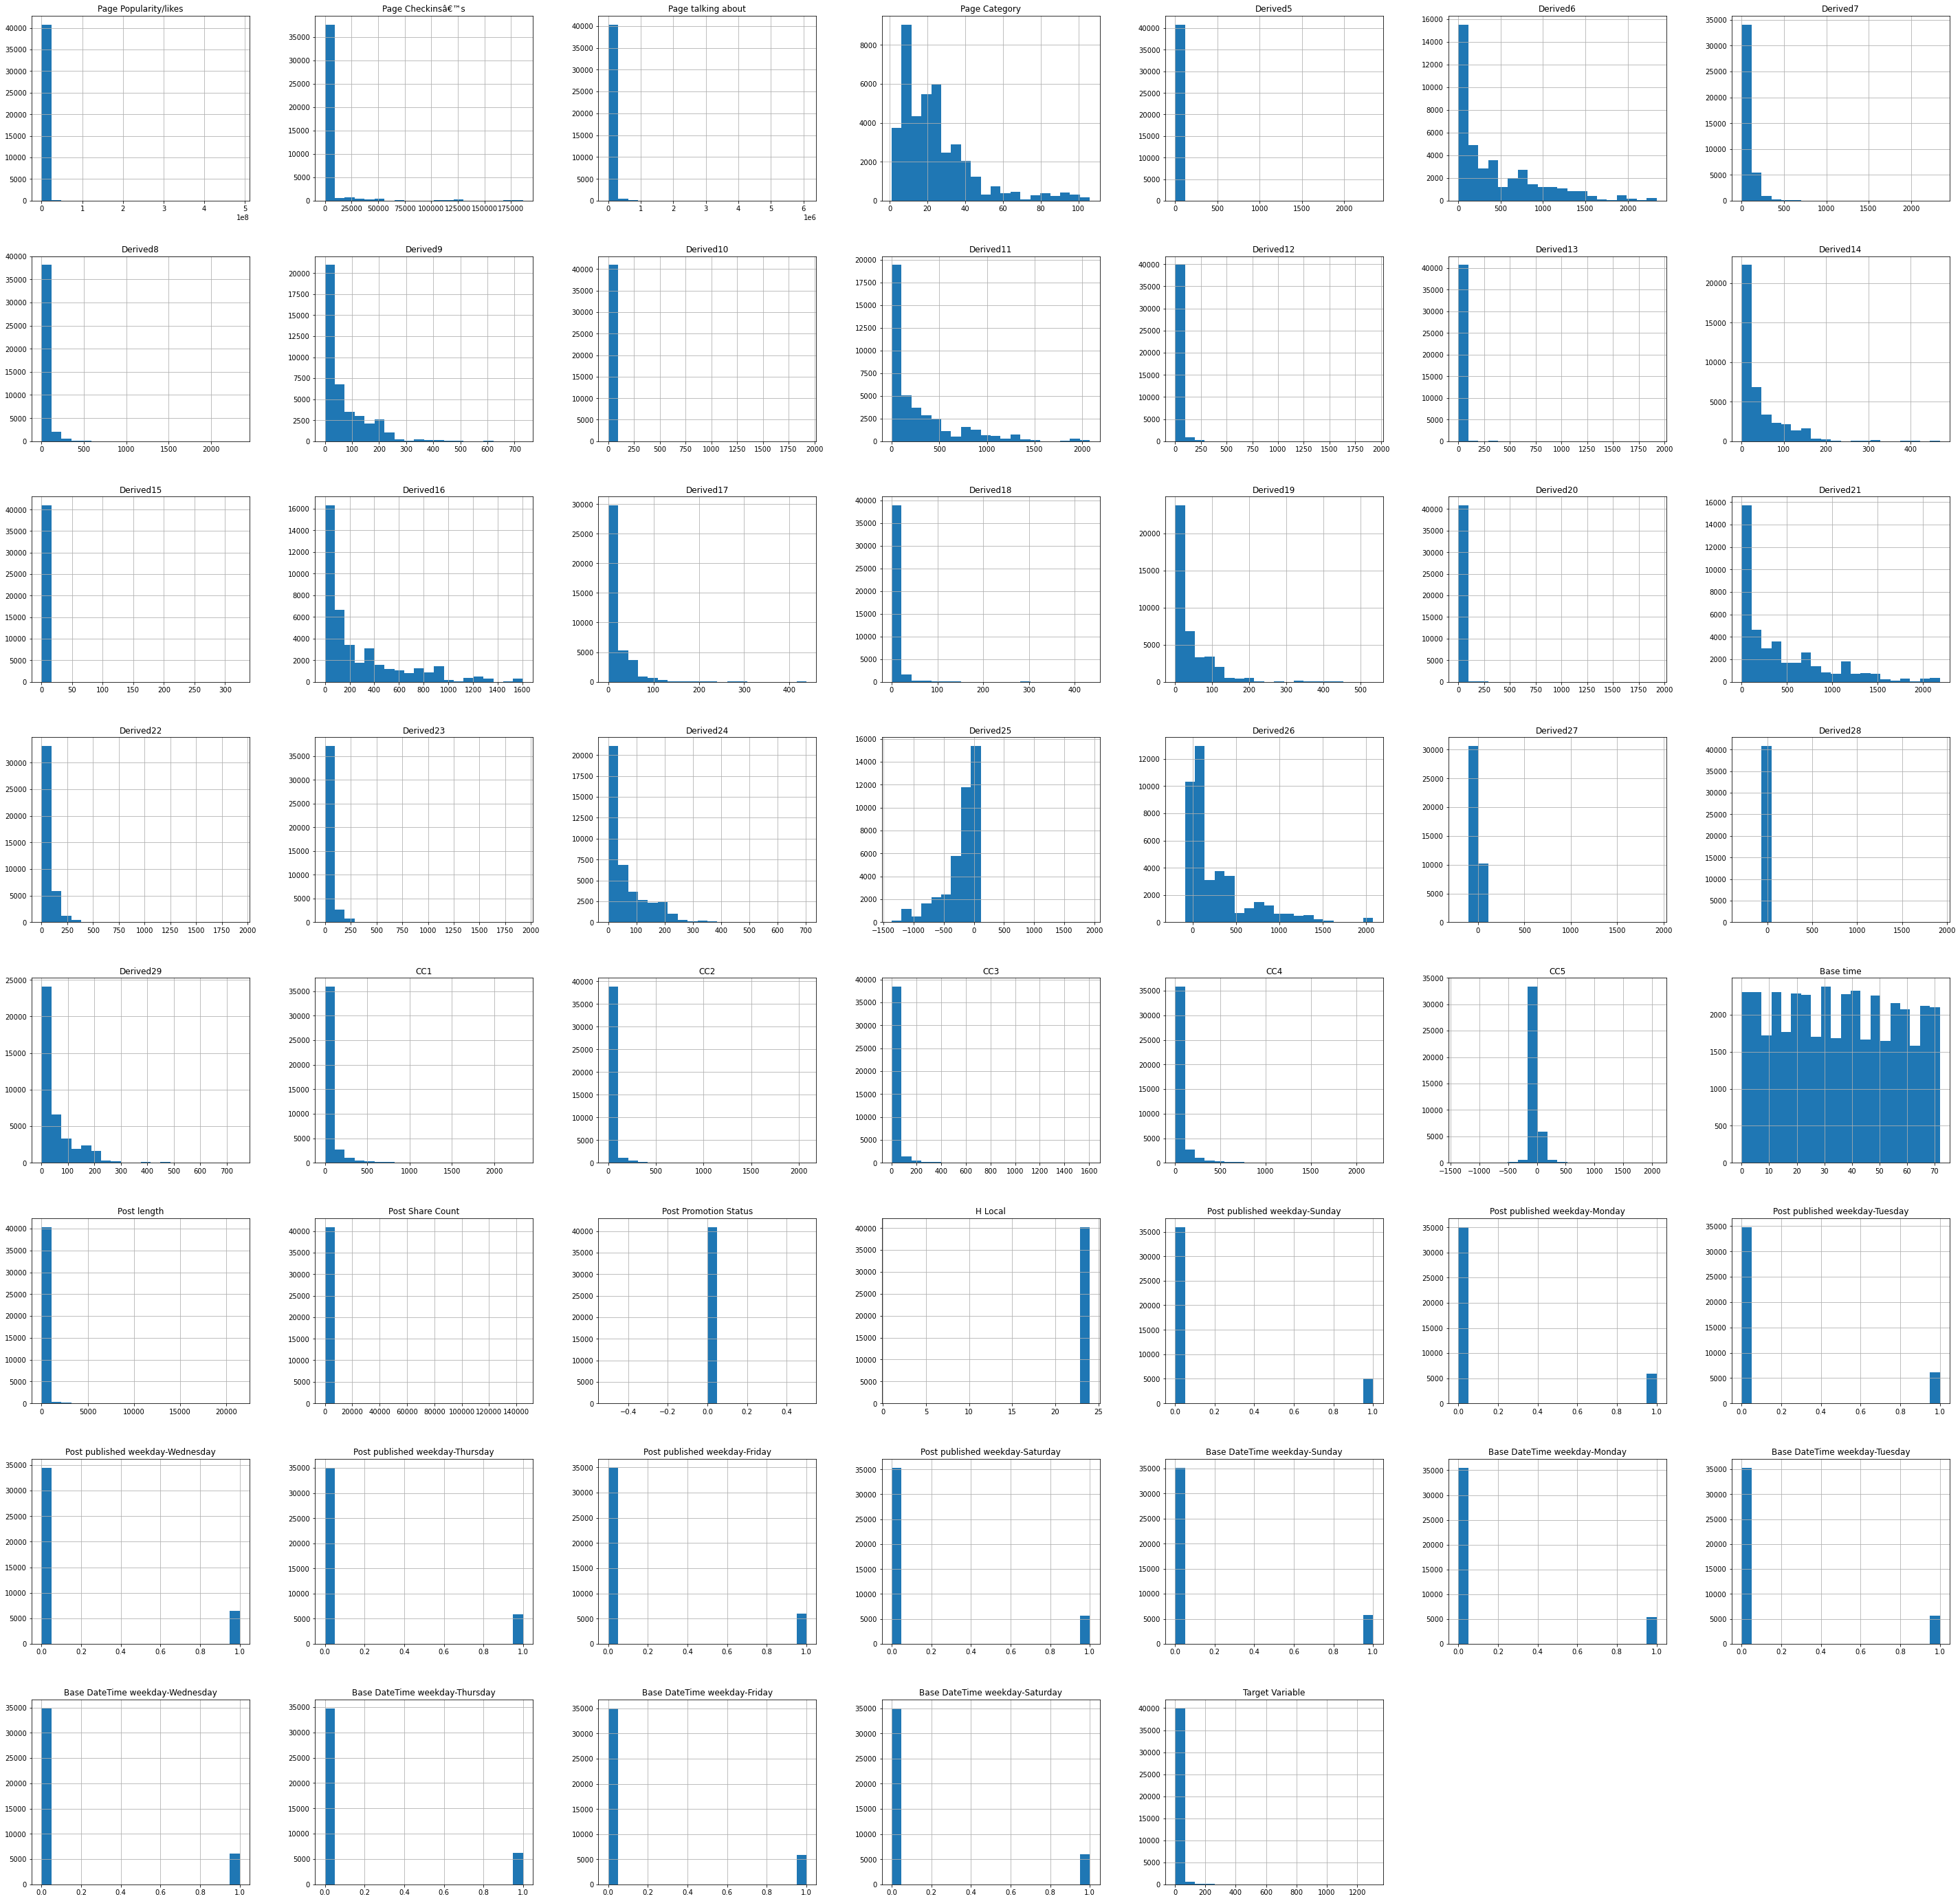

In [19]:
training_dataset.hist(bins=20, figsize=(50, 50))
plt.show()

## Correlation Analysis

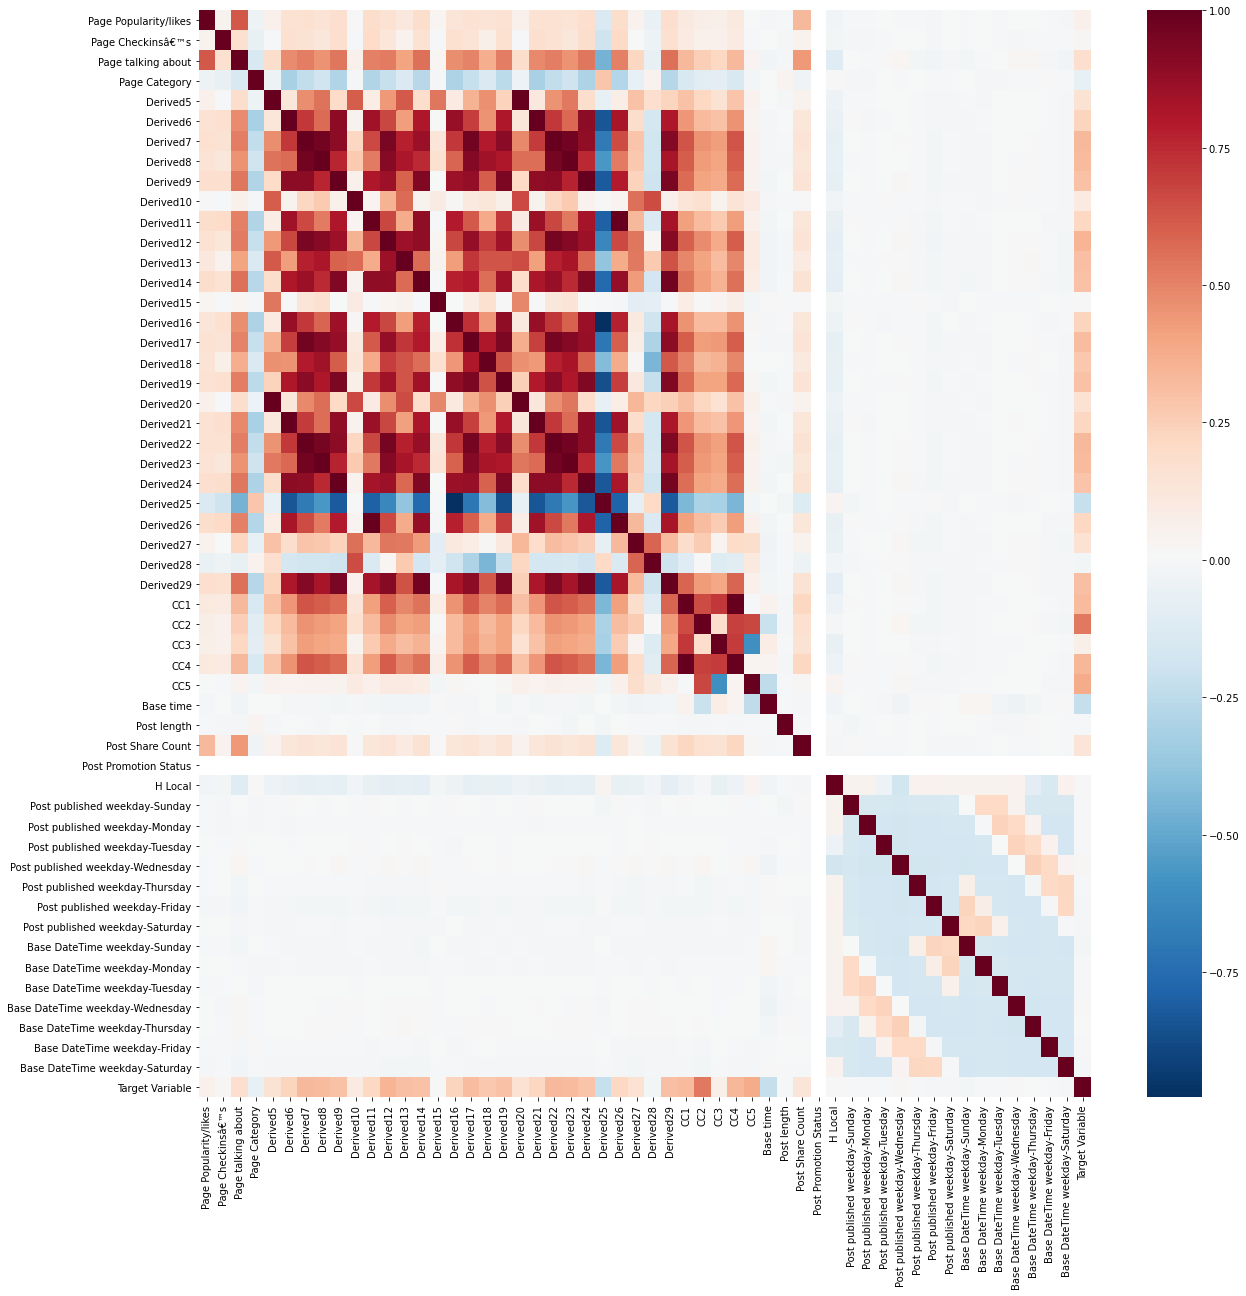

In [20]:
corr = training_dataset.corr()
plt.subplots(figsize=(20, 20))
sns.heatmap(data=corr, cmap="RdBu_r")
plt.show()

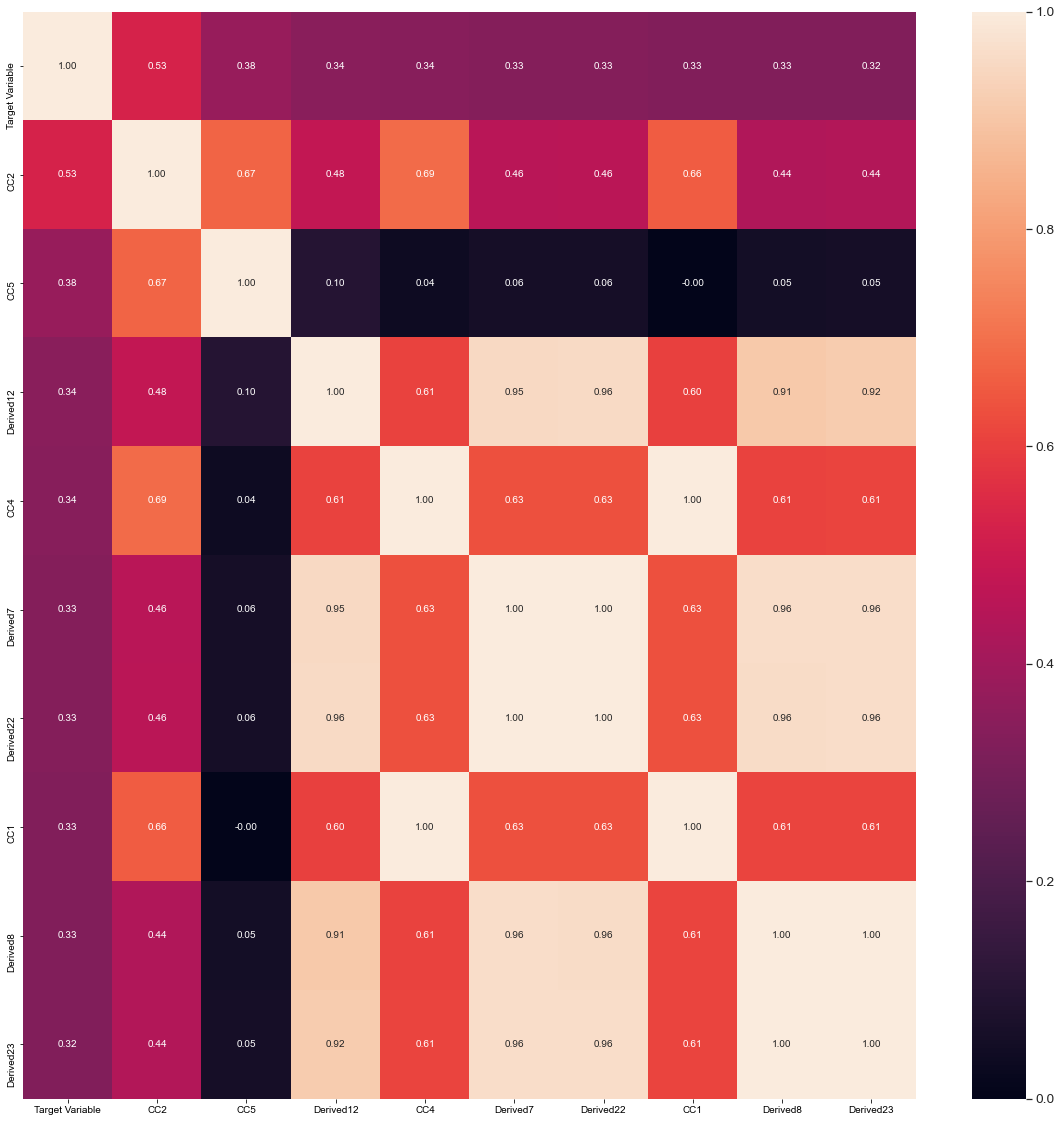

In [21]:
# The 10 most relevant features
plt.subplots(figsize=(20, 20))
c = corr.nlargest(10, 'Target Variable')['Target Variable'].index
cm = np.corrcoef(training_dataset[c].values.T)
sns.set(font_scale=1.25)
sns.heatmap(cm, cbar=True, annot=True, fmt='.2f', annot_kws={'size':10}, yticklabels=c.values, xticklabels=c.values)
plt.show()

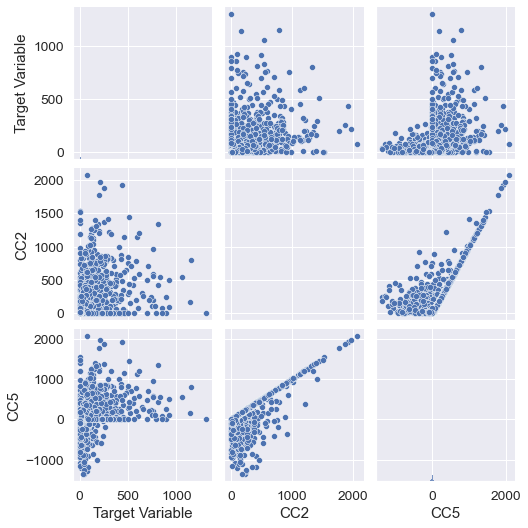

In [22]:
c_scatter = ["Target Variable", "CC2", "CC5"]
pair_scatter = sns.pairplot(training_dataset[c_scatter], height=2.5)
plt.show()

## Bivariate Analysis

### The highest comments in next H hrs is on Wednesday

<AxesSubplot:xlabel='Post published weekday', ylabel='Target variable'>

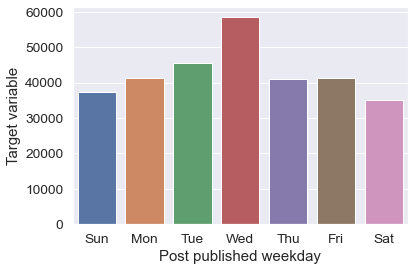

In [23]:
post_published_weekday_target_variable = post_published_weekday.iloc[:, 0:7].multiply(
    labels.iloc[:, 0], axis="index"
).sum()

post_published_weekday_target_variable = pd.DataFrame(
    {
        "Target variable": list(post_published_weekday_target_variable), 
        "Post published weekday": ["Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"]
    }
)

sns.barplot(x="Post published weekday", y="Target variable", data=post_published_weekday_target_variable)

<AxesSubplot:xlabel='Best datetime weekday', ylabel='Target variable'>

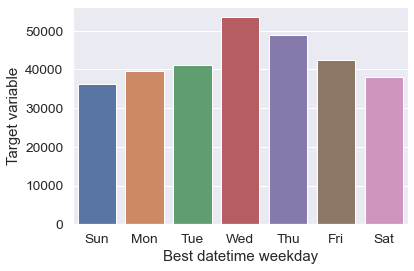

In [24]:
base_datetime_weekday_target_variable = base_datetime_weekday.iloc[:, 0:7].multiply(
    labels.iloc[:, 0], axis="index"
).sum()

base_datetime_weekday_target_variable = pd.DataFrame(
    {
        "Target variable": list(base_datetime_weekday_target_variable), 
        "Best datetime weekday": ["Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"]
    }
)

sns.barplot(x="Best datetime weekday", y="Target variable", data=base_datetime_weekday_target_variable)

### The highest posts is on Wednesday

<AxesSubplot:xlabel='Post published weekday', ylabel='Count'>

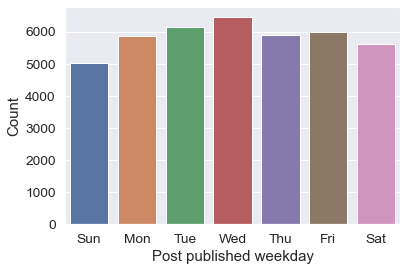

In [25]:
post_published_weekday_count = pd.DataFrame(
    {
        "Count": list(post_published_weekday.iloc[:, 0:7].sum()),
        "Post published weekday": ["Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"]
    }
)

sns.barplot(x="Post published weekday", y="Count", data=post_published_weekday_count)

<AxesSubplot:xlabel='Best datetime weekday', ylabel='Count'>

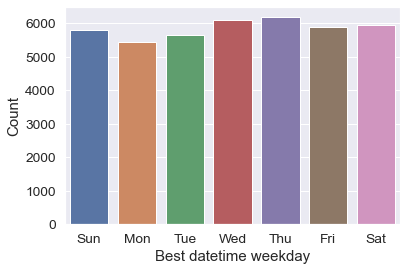

In [26]:
base_datetime_weekday_count = pd.DataFrame(
    {
        "Count": list(base_datetime_weekday.iloc[:, 0:7].sum()),
        "Best datetime weekday": ["Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"]
    }
)

sns.barplot(x="Best datetime weekday", y="Count", data=base_datetime_weekday_count)

### The highest posts is at 24 H Local

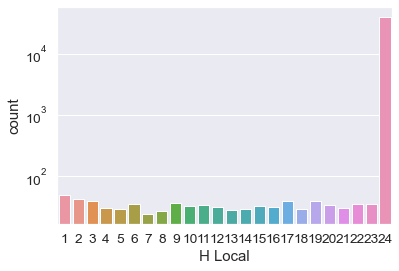

In [27]:
sns.countplot(x=training_dataset["H Local"].astype('int')).set_yscale("log")

### Most of the posts is at 24 H Local except Wednesday and Thursday

In [28]:
h_local_post_published_weekday = pd.concat([training_dataset["H Local"], post_published_weekday], axis=1)
h_local_post_published_weekday = h_local_post_published_weekday.groupby("H Local").sum()
h_local_post_published_weekday

,Post published weekday-Sunday,Post published weekday-Monday,Post published weekday-Tuesday,Post published weekday-Wednesday,Post published weekday-Thursday,Post published weekday-Friday,Post published weekday-Saturday
H Local,,,,,,,
1,0,0,14,35,0,0,0
2,0,0,12,31,0,0,0
3,0,0,13,27,0,0,0
4,0,0,8,22,0,0,0
5,0,0,8,21,0,0,0
6,0,0,8,27,0,0,0
7,0,0,10,14,0,0,0
8,0,0,6,21,0,0,0
9,0,0,10,27,0,0,0


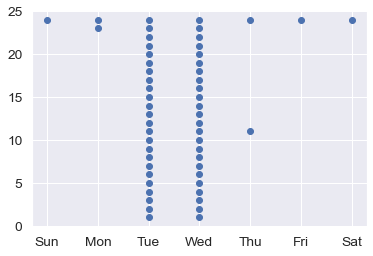

In [29]:
weekdays = pd.DataFrame(["Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"])
for i in range(7):
    for j in range(24):
        if h_local_post_published_weekday.iloc[j, i] != 0:
            plt.scatter(weekdays.iloc[i, 0], j + 1, color='b')

In [30]:
h_local_base_datetime_weekday = pd.concat([training_dataset["H Local"], base_datetime_weekday], axis=1)
h_local_base_datetime_weekday = h_local_base_datetime_weekday.groupby("H Local").sum()
h_local_base_datetime_weekday

,Base DateTime weekday-Sunday,Base DateTime weekday-Monday,Base DateTime weekday-Tuesday,Base DateTime weekday-Wednesday,Base DateTime weekday-Thursday,Base DateTime weekday-Friday,Base DateTime weekday-Saturday
H Local,,,,,,,
1,0,0,0,0,6,43,0
2,0,0,0,0,7,36,0
3,0,0,0,0,9,31,0
4,0,0,0,0,3,27,0
5,0,0,0,0,8,21,0
6,0,0,0,0,9,26,0
7,0,0,0,0,8,16,0
8,0,0,0,0,5,22,0
9,0,0,0,0,12,25,0


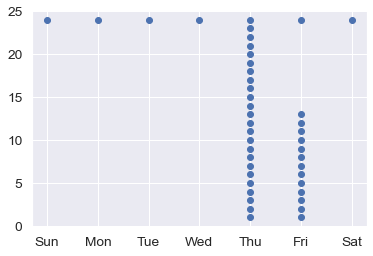

In [31]:
weekdays = pd.DataFrame(["Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"])
for i in range(7):
    for j in range(24):
        if h_local_base_datetime_weekday.iloc[j, i] != 0:
            plt.scatter(weekdays.iloc[i, 0], j + 1, color='b')

### Post Promotion Status has no effect on the predection

<AxesSubplot:xlabel='Post Promotion Status', ylabel='count'>

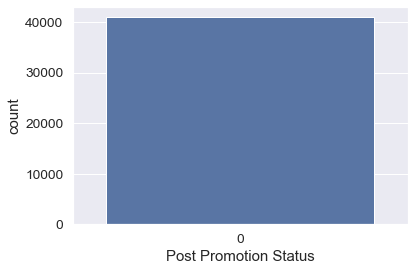

In [32]:
sns.countplot(x=training_dataset["Post Promotion Status"])

### The highest posts categories are 9, 18 and 24

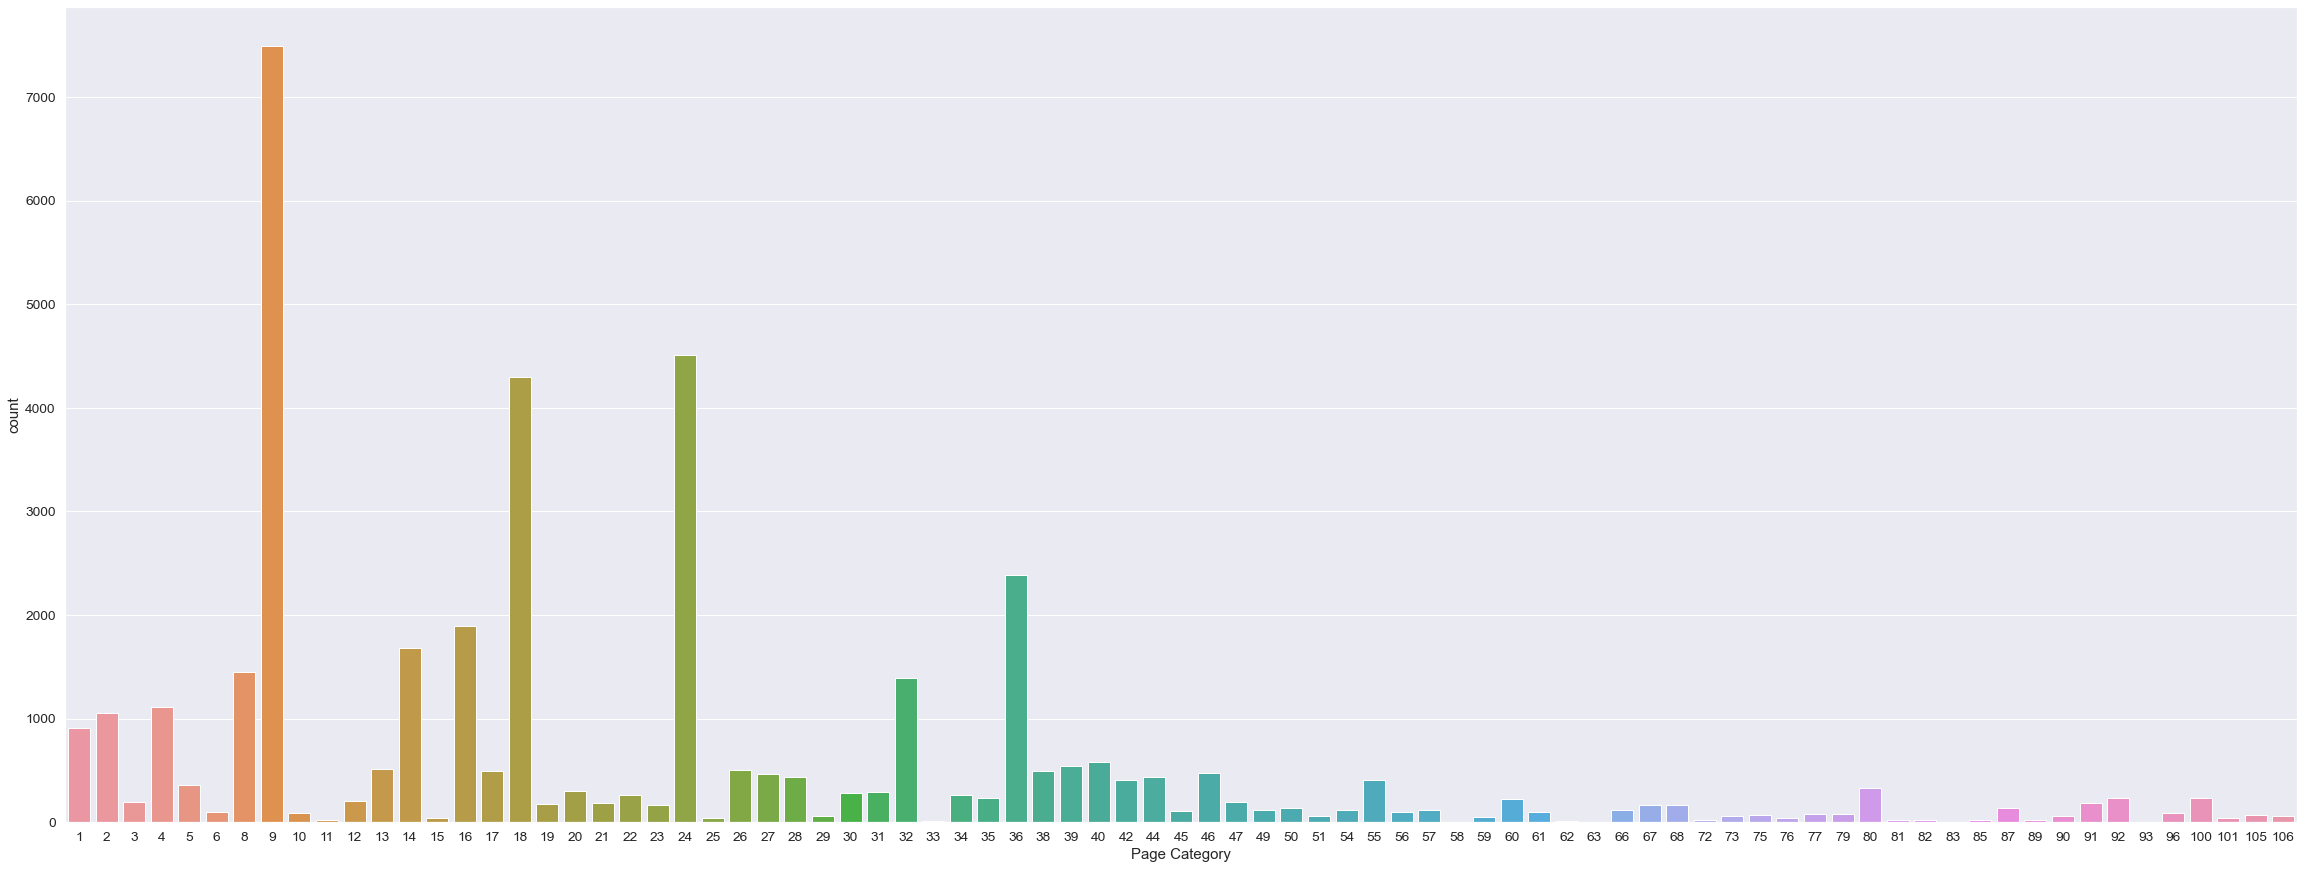

In [33]:
plt.subplots(figsize=(40, 15))
sns.countplot(x=training_dataset["Page Category"])
plt.show()

### The highest popularity category is 9

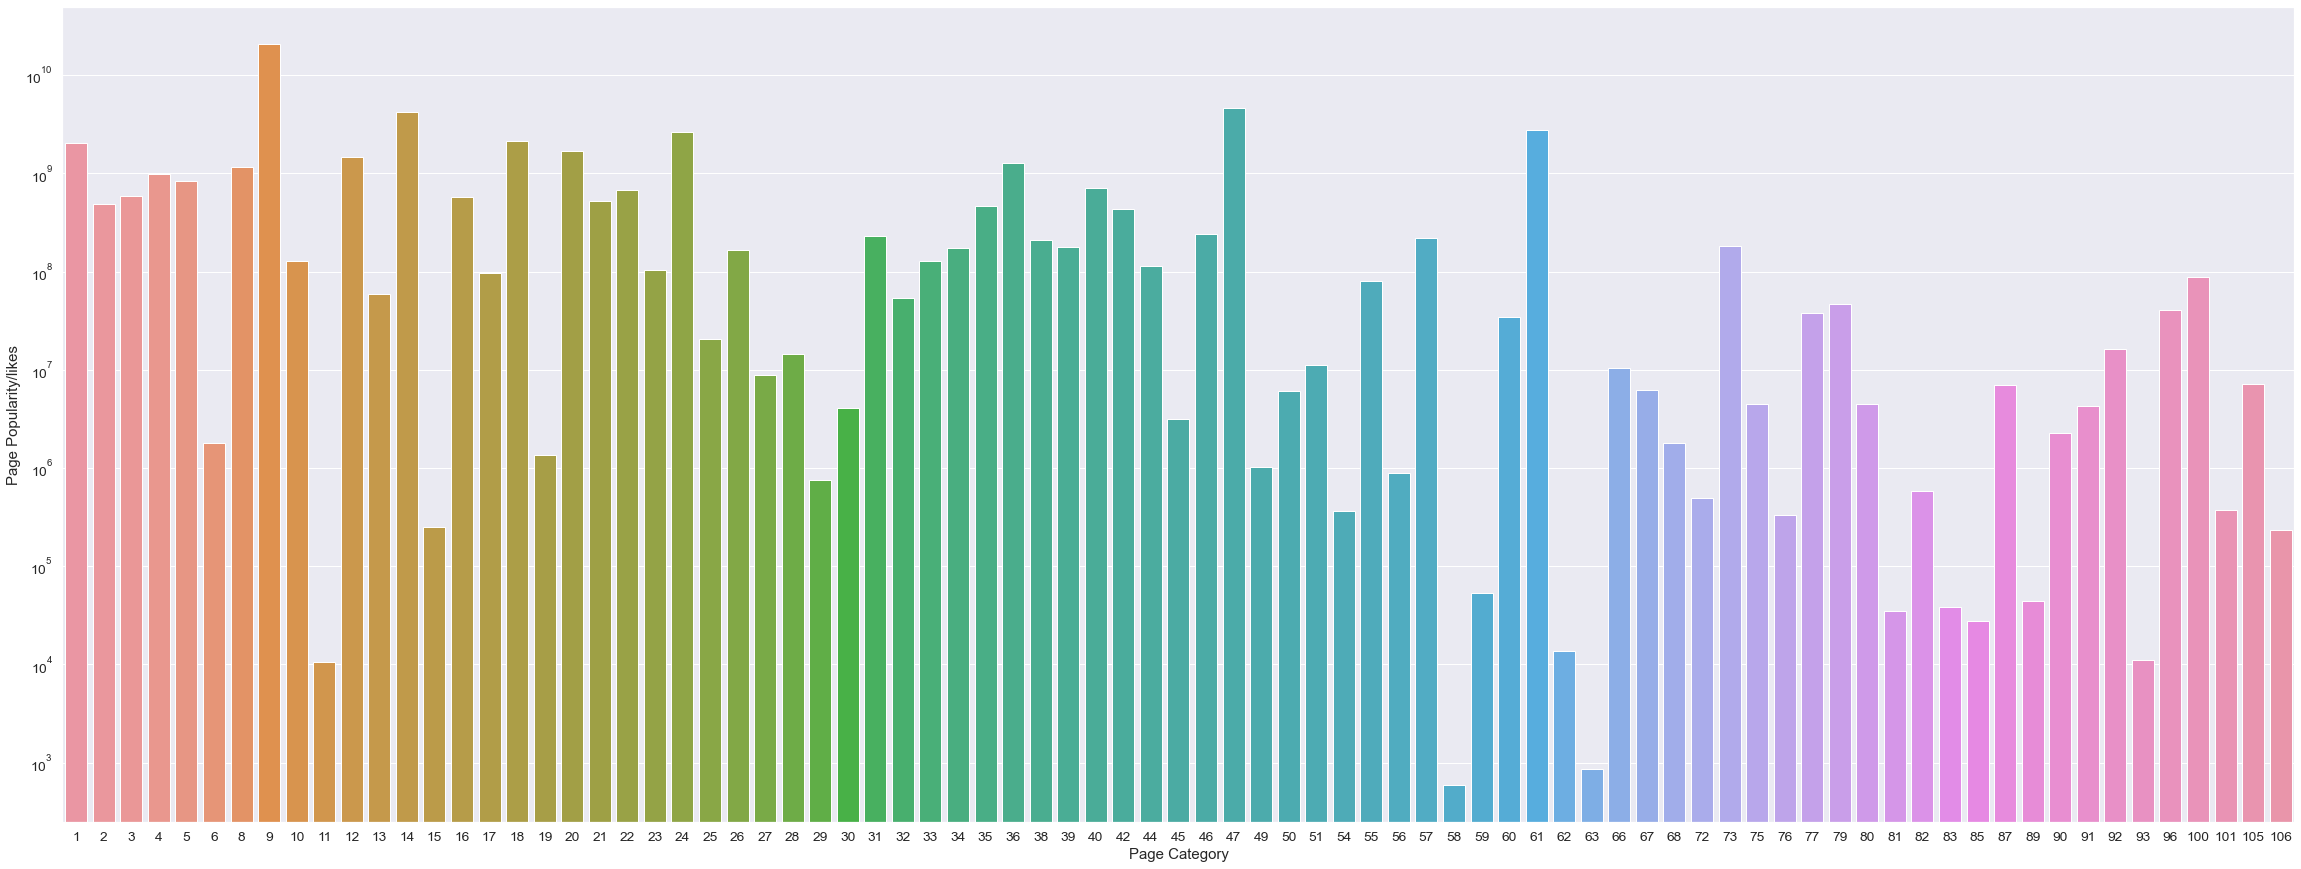

In [34]:
page_popularity_likes_page_category = pd.concat(
    [training_dataset["Page Popularity/likes"], training_dataset["Page Category"]], axis=1
)
page_popularity_likes_page_category = page_popularity_likes_page_category.groupby("Page Category").sum()
page_popularity_likes_page_category.index.name = "Page Category"
page_popularity_likes_page_category.reset_index(inplace=True)
plt.subplots(figsize=(40, 15))
sns.barplot(x="Page Category", y="Page Popularity/likes", data=page_popularity_likes_page_category).set_yscale("log")
plt.show()

### The highest post share count category is 9

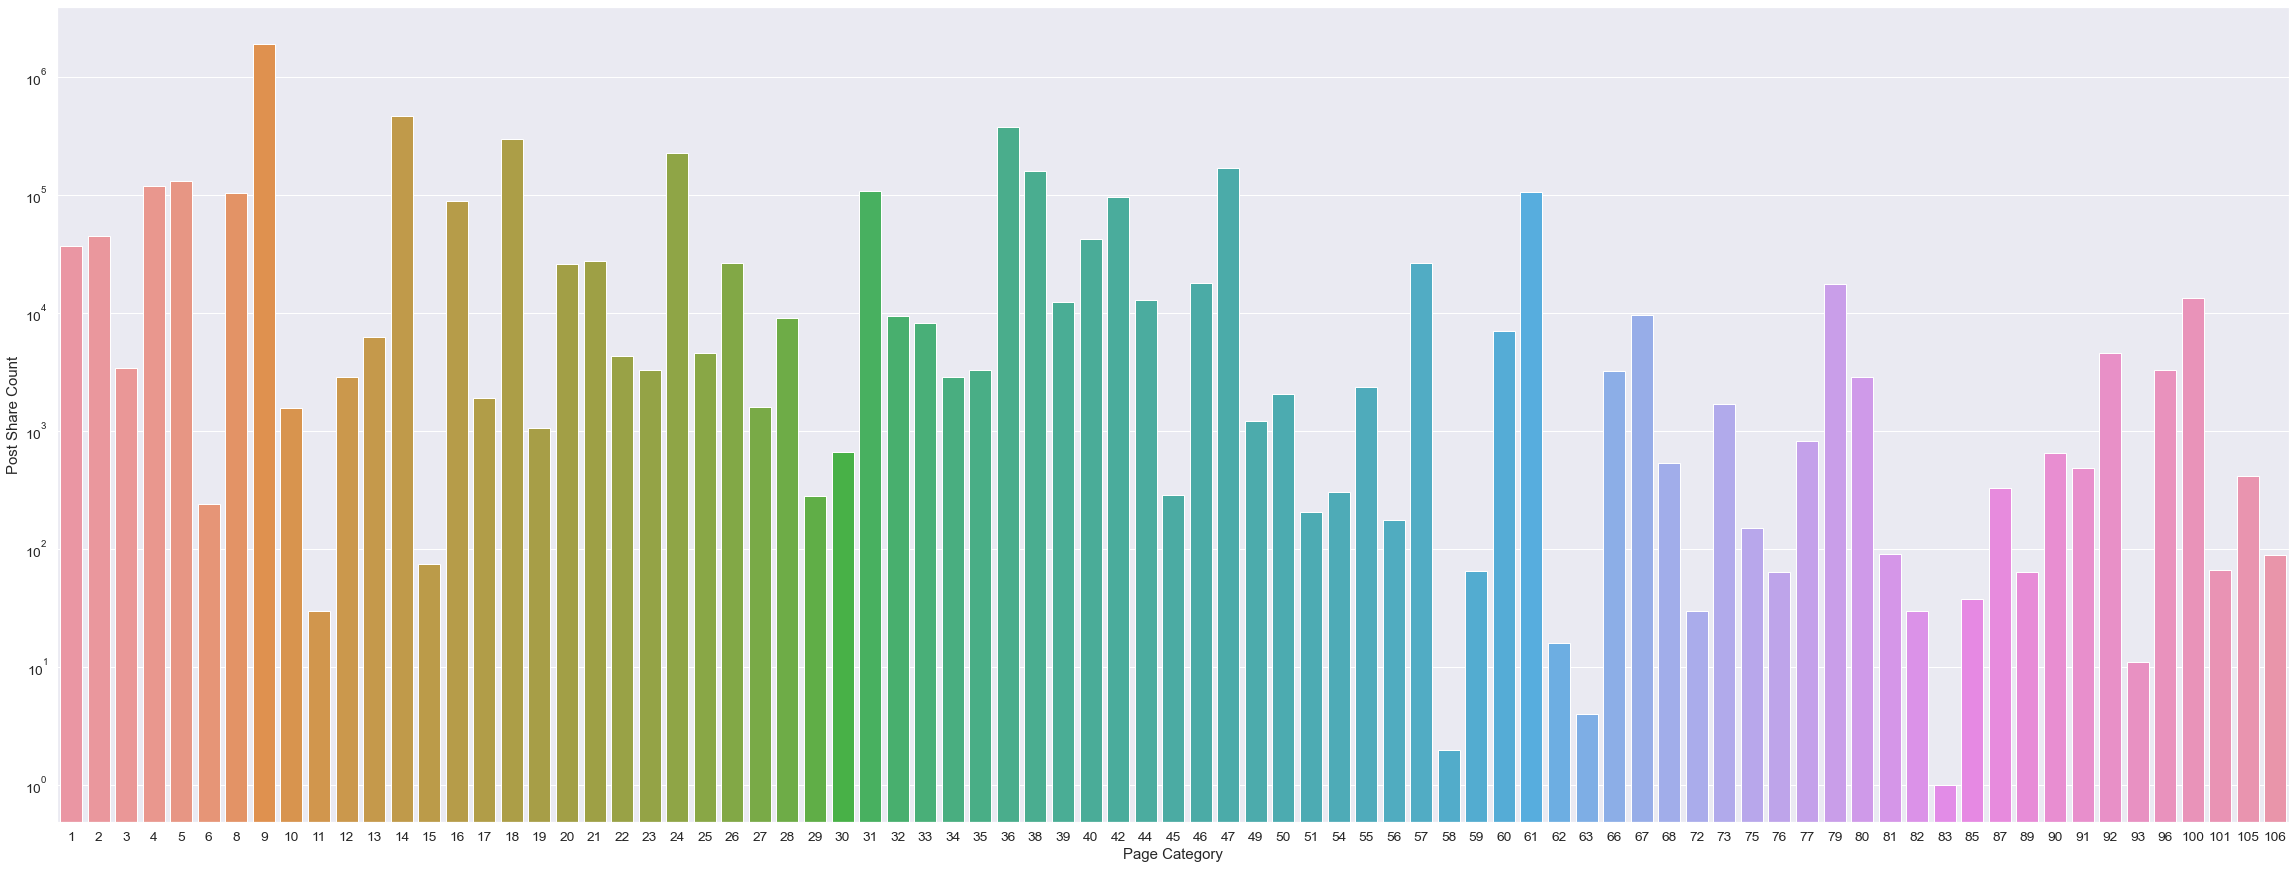

In [35]:
post_share_count_page_category = pd.concat(
    [training_dataset["Post Share Count"], training_dataset["Page Category"]], axis=1
)
post_share_count_page_category = post_share_count_page_category.groupby("Page Category").sum()
post_share_count_page_category.index.name = "Page Category"
post_share_count_page_category.reset_index(inplace=True)
plt.subplots(figsize=(40, 15))
sns.barplot(x="Page Category", y="Post Share Count", data=post_share_count_page_category).set_yscale("log")
plt.show()

### When post is longer, the popularity of the post is lower

<AxesSubplot:xlabel='Post length', ylabel='Page Popularity/likes'>

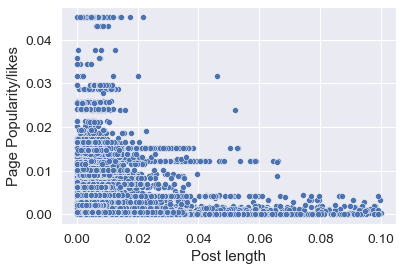

In [36]:
page_popularity_likes_post_length = pd.concat(
    [training_dataset_norm["Page Popularity/likes"], training_dataset_norm["Post length"]], axis=1
)

page_popularity_likes_post_length = page_popularity_likes_post_length[
    page_popularity_likes_post_length["Page Popularity/likes"] < 0.05
]
page_popularity_likes_post_length = page_popularity_likes_post_length[
    page_popularity_likes_post_length["Post length"] < 0.1
]

sns.scatterplot(x="Post length", y="Page Popularity/likes", data=page_popularity_likes_post_length)

<AxesSubplot:xlabel='Page Popularity/likes', ylabel='Post Share Count'>

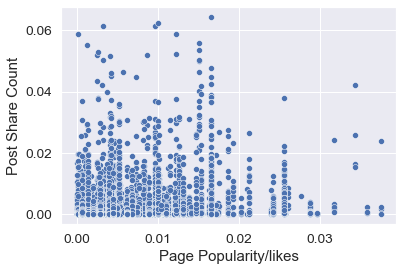

In [37]:
page_popularity_likes_post_share_count = pd.concat(
    [training_dataset_norm["Page Popularity/likes"], training_dataset_norm["Post Share Count"]], axis=1
)

page_popularity_likes_post_share_count = page_popularity_likes_post_share_count[
    page_popularity_likes_post_share_count["Page Popularity/likes"] < 0.04
]
page_popularity_likes_post_share_count = page_popularity_likes_post_share_count[
    page_popularity_likes_post_share_count["Post Share Count"] < 0.07
]

sns.scatterplot(x="Page Popularity/likes", y="Post Share Count", data=page_popularity_likes_post_share_count)

<AxesSubplot:xlabel='Page talking about', ylabel='Post Share Count'>

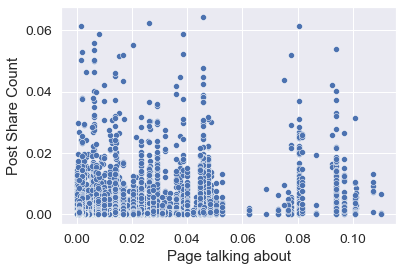

In [38]:
page_talking_about_post_share_count = pd.concat(
    [training_dataset_norm["Page talking about"], training_dataset_norm["Post Share Count"]], axis=1
)

page_talking_about_post_share_count = page_talking_about_post_share_count[
    page_talking_about_post_share_count["Page talking about"] < 0.13
]
page_talking_about_post_share_count = page_talking_about_post_share_count[
    page_talking_about_post_share_count["Post Share Count"] < 0.07
]

sns.scatterplot(x="Page talking about", y="Post Share Count", data=page_talking_about_post_share_count)

<AxesSubplot:xlabel='Page Popularity/likes', ylabel='CC2'>

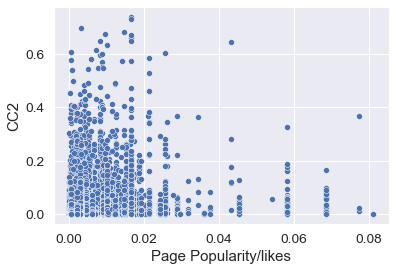

In [39]:
page_popularity_likes_cc2 = pd.concat(
    [training_dataset_norm["Page Popularity/likes"], training_dataset_norm["CC2"]], axis=1
)

page_popularity_likes_cc2 = page_popularity_likes_cc2[
    page_popularity_likes_cc2["Page Popularity/likes"] < 0.1
]
page_popularity_likes_cc2 = page_popularity_likes_cc2[
    page_popularity_likes_cc2["CC2"] < 0.8
]

sns.scatterplot(x="Page Popularity/likes", y="CC2", data=page_popularity_likes_cc2)

### When post is longer, the comments in last 24 hours is fewer

<AxesSubplot:xlabel='Post length', ylabel='CC2'>

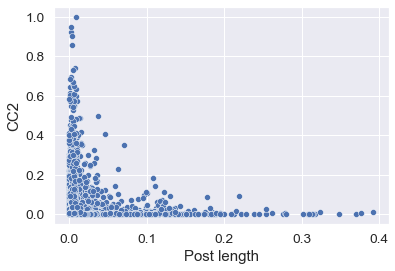

In [40]:
post_length_cc2 = pd.concat(
    [training_dataset_norm["Post length"], training_dataset_norm["CC2"]], axis=1
)

post_length_cc2 = post_length_cc2[
    post_length_cc2["Post length"] < 0.4
]

sns.scatterplot(x="Post length", y="CC2", data=post_length_cc2)